In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.drop(['customerID'],axis=1,inplace=True)

In [5]:
data.drop(['PaperlessBilling'],axis=1,inplace=True)

In [6]:
data.drop(['PaymentMethod'] ,axis=1,inplace=True)

In [7]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [8]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
data['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [10]:
data1 = data[data['TotalCharges']!=" "]

In [11]:
data1.shape


(7032, 18)

In [12]:
data1.TotalCharges= data1.TotalCharges.astype('float64')

C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
data1.TotalCharges.dtypes

dtype('float64')

In [14]:
data1.tenure

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7032, dtype: int64

In [15]:
data1[data1.Churn=='Yes'].tenure
data1[data1.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\numpy\core\fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


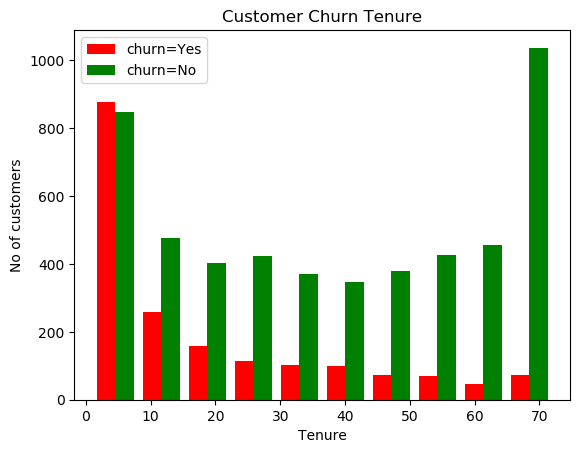

In [17]:
data_churn_yes = data1[data1.Churn=='Yes'].tenure
data_churn_no  = data1[data1.Churn=='No'].tenure


plt.title('Customer Churn Tenure')
plt.xlabel('Tenure')
plt.ylabel('No of customers')
plt.hist([data_churn_yes,data_churn_no],color=['red','green'],label=['churn=Yes','churn=No'])
plt.legend()



In [18]:
monthlycharge_churn_yes = data1[data1.Churn=="Yes"]


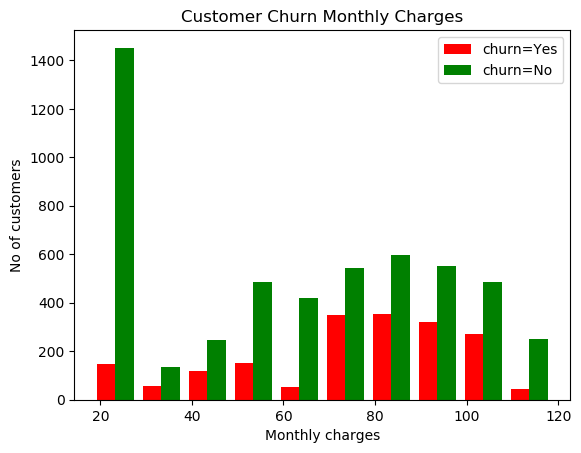

In [19]:
monthlycharge_churn_yes = data1[data1.Churn=="Yes"].MonthlyCharges
monthlycharge_churn_no = data1[data1.Churn=="No"].MonthlyCharges


plt.title("Customer Churn Monthly Charges")
plt.xlabel('Monthly charges')
plt.ylabel('No of customers')
plt.hist([monthlycharge_churn_yes,monthlycharge_churn_no],color=['red','green'],label=['churn=Yes','churn=No'])
plt.legend()

In [20]:
for column in data1:
    print(column)


gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
MonthlyCharges
TotalCharges
Churn


In [16]:
for column in data1:
    print(data1[column].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [17]:
for column in data1:
    if data1[column].dtypes ==object:
        print(data1[column].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['No' 'Yes']


In [18]:
for column in data1:
    if data1[column].dtypes ==object:
        print(f'{column}={data1[column].unique()}')

gender=['Female' 'Male']
Partner=['Yes' 'No']
Dependents=['No' 'Yes']
PhoneService=['No' 'Yes']
MultipleLines=['No phone service' 'No' 'Yes']
InternetService=['DSL' 'Fiber optic' 'No']
OnlineSecurity=['No' 'Yes' 'No internet service']
OnlineBackup=['Yes' 'No' 'No internet service']
DeviceProtection=['No' 'Yes' 'No internet service']
TechSupport=['No' 'Yes' 'No internet service']
StreamingTV=['No' 'Yes' 'No internet service']
StreamingMovies=['No' 'Yes' 'No internet service']
Contract=['Month-to-month' 'One year' 'Two year']
Churn=['No' 'Yes']


In [19]:
data1.replace('No internet service','No',inplace=True)
data1.replace('No phone service','No',inplace=True)




C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\pandas\core\frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [20]:
for column in data1:
    if data1[column].dtypes==object:
        print(f'{column} = {data1[column].unique()}')

gender = ['Female' 'Male']
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
PhoneService = ['No' 'Yes']
MultipleLines = ['No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes']
OnlineBackup = ['Yes' 'No']
DeviceProtection = ['No' 'Yes']
TechSupport = ['No' 'Yes']
StreamingTV = ['No' 'Yes']
StreamingMovies = ['No' 'Yes']
Contract = ['Month-to-month' 'One year' 'Two year']
Churn = ['No' 'Yes']


In [21]:
#data1=pd.get_dummies(data1,drop_first=True)
#data1.shape

In [22]:
data1.iloc[data1.TotalCharges.value_counts()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
11,Male,0,No,No,16,Yes,No,No,No,No,No,No,No,No,Two year,18.95,326.80,No
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,56.15,3487.95,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,104.80,3046.05,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,104.80,3046.05,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,104.80,3046.05,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No


In [23]:
data1=pd.get_dummies(data1,drop_first=True)
data1.shape

(7032, 20)

In [24]:
data1.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


scaling is very important in Deep learning

In [25]:
scaling_col= ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data1[scaling_col]=scaler.fit_transform(data1[scaling_col])

In [26]:
data1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes
0,0,0.000000,0.115423,0.001275,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0.464789,0.385075,0.215867,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
2,0,0.014085,0.354229,0.010310,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
3,0,0.619718,0.239303,0.210241,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0
4,0,0.014085,0.521891,0.015330,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.323944,0.662189,0.227521,1,1,1,1,1,0,0,1,0,1,1,1,1,1,0,0
7039,0,1.000000,0.845274,0.847461,0,1,1,1,1,1,0,0,1,1,0,1,1,1,0,0
7040,0,0.140845,0.112935,0.037809,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
7041,1,0.042254,0.558706,0.033210,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1


In [27]:
indep=data1.drop('Churn_Yes', axis= 'columns')
dep=data1['Churn_Yes']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(indep,dep,test_size=0.2,random_state=5)


In [29]:
x_train.shape

(5625, 19)

In [30]:
x_test.shape

(1407, 19)


# here we can see dataset imbalancness 

In [32]:
#train test split count
y_train.value_counts()

0    4164
1    1461
Name: Churn_Yes, dtype: int64

In [33]:
#Actual dataset count
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [43]:
import tensorflow as tf
from tensorflow import keras

In [47]:
ANN=keras.Sequential([
    keras.layers.Dense(50,input_shape=(19,),activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
ANN.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

ANN.fit(x_train,y_train,epochs=5)

Epoch 1/5
176/176 [==============================] - 6s 8ms/step - loss: 0.4853 - accuracy: 0.7543
Epoch 2/5
176/176 [==============================] - 1s 8ms/step - loss: 0.4244 - accuracy: 0.7952
Epoch 3/5
176/176 [==============================] - 1s 7ms/step - loss: 0.4194 - accuracy: 0.7996
Epoch 4/5
176/176 [==============================] - 1s 8ms/step - loss: 0.4155 - accuracy: 0.7972
Epoch 5/5
176/176 [==============================] - 2s 9ms/step - loss: 0.4136 - accuracy: 0.8020


In [48]:
ANN=keras.Sequential([
    keras.layers.Dense(50,input_shape=(19,),activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1,activation='softmax')
])
ANN.compile(
    optimizer='SGD',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

ANN.fit(x_train,y_train,epochs=10)

Epoch 1/10
176/176 [==============================] - 4s 8ms/step - loss: 0.5987 - accuracy: 0.2597
Epoch 2/10
176/176 [==============================] - 1s 7ms/step - loss: 0.5438 - accuracy: 0.2597
Epoch 3/10
176/176 [==============================] - 1s 7ms/step - loss: 0.5150 - accuracy: 0.2597
Epoch 4/10
176/176 [==============================] - 1s 7ms/step - loss: 0.4888 - accuracy: 0.2597
Epoch 5/10
176/176 [==============================] - 1s 7ms/step - loss: 0.4673 - accuracy: 0.2597
Epoch 6/10
176/176 [==============================] - 1s 7ms/step - loss: 0.4521 - accuracy: 0.2597
Epoch 7/10
176/176 [==============================] - 1s 7ms/step - loss: 0.4419 - accuracy: 0.2597
Epoch 8/10
176/176 [==============================] - 1s 7ms/step - loss: 0.4356 - accuracy: 0.2597
Epoch 9/10
176/176 [==============================] - 2s 9ms/step - loss: 0.4315 - accuracy: 0.2597
Epoch 10/10
176/176 [==============================] - 1s 7ms/step - loss: 0.4284 - accuracy: 0.2597

In [49]:
ANN=keras.Sequential([
    keras.layers.Dense(50,input_shape=(19,),activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1,activation='softmax')
])
ANN.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

ANN.fit(x_train,y_train,epochs=5)

Epoch 1/5
176/176 [==============================] - 4s 7ms/step - loss: 0.4738 - accuracy: 0.2597
Epoch 2/5
176/176 [==============================] - 1s 7ms/step - loss: 0.4217 - accuracy: 0.2597
Epoch 3/5
176/176 [==============================] - 1s 7ms/step - loss: 0.4166 - accuracy: 0.2597
Epoch 4/5
176/176 [==============================] - 1s 8ms/step - loss: 0.4128 - accuracy: 0.2597
Epoch 5/5
176/176 [==============================] - 1s 7ms/step - loss: 0.4098 - accuracy: 0.2597


In [50]:
ANN=keras.Sequential([
    keras.layers.Dense(50,input_shape=(19,),activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
ANN.compile(
    optimizer='SGD',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

ANN.fit(x_train,y_train,epochs=5)

Epoch 1/5
176/176 [==============================] - 4s 7ms/step - loss: 0.6013 - accuracy: 0.7202
Epoch 2/5
176/176 [==============================] - 1s 7ms/step - loss: 0.5379 - accuracy: 0.7403
Epoch 3/5
176/176 [==============================] - 1s 7ms/step - loss: 0.5101 - accuracy: 0.7403
Epoch 4/5
176/176 [==============================] - 1s 7ms/step - loss: 0.4856 - accuracy: 0.7435
Epoch 5/5
176/176 [==============================] - 1s 7ms/step - loss: 0.4657 - accuracy: 0.7621


In [53]:
ANN=keras.Sequential([
    keras.layers.Dense(100,input_shape=(19,),activation='relu'),
    keras.layers.Dense(60,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
ANN.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

ANN.fit(x_train,y_train,epochs=20)

Epoch 1/20
176/176 [==============================] - 4s 8ms/step - loss: 0.4602 - accuracy: 0.7788
Epoch 2/20
176/176 [==============================] - 1s 7ms/step - loss: 0.4190 - accuracy: 0.7998
Epoch 3/20
176/176 [==============================] - 1s 7ms/step - loss: 0.4167 - accuracy: 0.8020
Epoch 4/20
176/176 [==============================] - 1s 7ms/step - loss: 0.4140 - accuracy: 0.8052
Epoch 5/20
176/176 [==============================] - 1s 8ms/step - loss: 0.4085 - accuracy: 0.8039
Epoch 6/20
176/176 [==============================] - 1s 8ms/step - loss: 0.4052 - accuracy: 0.8092
Epoch 7/20
176/176 [==============================] - 1s 8ms/step - loss: 0.4041 - accuracy: 0.8094
Epoch 8/20
176/176 [==============================] - 2s 9ms/step - loss: 0.4026 - accuracy: 0.8103
Epoch 9/20
176/176 [==============================] - 2s 9ms/step - loss: 0.4003 - accuracy: 0.8100
Epoch 10/20
176/176 [==============================] - 1s 8ms/step - loss: 0.3978 - accuracy: 0.8133

In [54]:
ANN.evaluate(x_test,y_test)

44/44 [==============================] - 1s 11ms/step - loss: 0.4579 - accuracy: 0.7790


[0.45788267254829407, 0.7789623141288757]

In [55]:
y_predict= ANN.predict(x_test)

44/44 [==============================] - 1s 6ms/step


In [56]:
y_predict

array([[0.26917467],
       [0.3307986 ],
       [0.01654921],
       ...,
       [0.737806  ],
       [0.72770846],
       [0.7999797 ]], dtype=float32)

In [57]:
y_test

2660    0
744     0
5579    1
64      1
3287    1
       ..
2024    0
4396    1
4081    1
1297    0
4899    1
Name: Churn_Yes, Length: 1407, dtype: uint8

In [58]:
y_pred=[]
for ypred in y_predict:
    if ypred>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [59]:
y_pred

[0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,


In [62]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.65      0.53      0.58       408

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.72      1407
weighted avg       0.77      0.78      0.77      1407



In [63]:
cm = confusion_matrix(y_test,y_pred)

Text(0.5, 1, 'Confusion Matrix Visualisation')

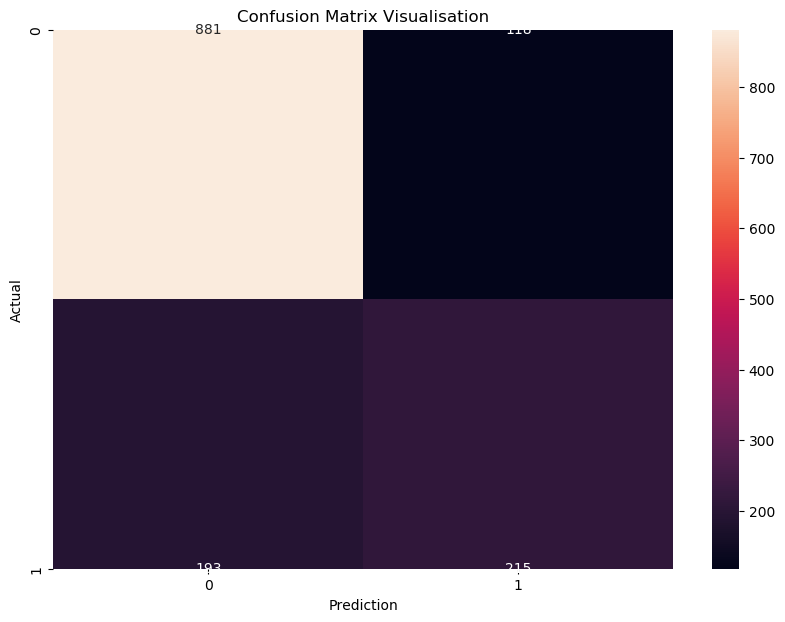

In [67]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title("Confusion Matrix Visualisation")

 #  from here will do imbalanced dataset process
 

In [42]:
count_class_0,count_class_1=data.Churn.value_counts()

count_class_0= data1[data1['Churn_Yes']==0]
count_class_1= data1[data1['Churn_Yes']==1]

In [45]:

count_class_1.shape

(1869, 20)

In [46]:
count_class_0.shape

(5163, 20)

In [47]:
 #under sampling
    
count_class_0.sample(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes
3706,0,0.352113,0.657214,0.261112,1,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0
986,0,0.154930,0.254229,0.060253,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
count_class_0.sample(1869).shape

(1869, 20)

In [53]:
under_df_0 = count_class_0.sample(1869)

In [54]:
df_under_sample = pd.concat([under_df_0,count_class_1])

In [55]:
df_under_sample.shape    #1869+1869 ==3738

(3738, 20)

In [58]:
df_under_sample.Churn_Yes.value_counts()

0    1869
1    1869
Name: Churn_Yes, dtype: int64

In [68]:
x = df_under_sample.drop('Churn_Yes',axis=1)
y= df_under_sample['Churn_Yes']

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state= 15,stratify=y)

C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current

In [70]:
y_train.value_counts()

0    1495
1    1495
Name: Churn_Yes, dtype: int64

In [71]:
y_test.value_counts()

1    374
0    374
Name: Churn_Yes, dtype: int64

In [78]:
from tensorflow import keras
from sklearn.metrics import classification_report

In [85]:
def ANN1(x_train,y_train,weights):

    ANN1=keras.Sequential([
        keras.layers.Dense(30,input_shape=(19,),activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    ANN1.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])

    if weights == -1:
        ANN1.fit(x_train,y_train,epochs=10)
    else:
        ANN1.fit(x_train,y_train,epochs=10, class_weight = weights)


    ANN1.evaluate(x_test,y_test)

    y_predict = ANN1.predict(x_test)
    y_pred = np.round(y_predict)


    print('classification_report:\n',classification_report(y_test,y_pred))
    
    return y_pred



In [86]:
ANN1(x_train,y_train,-1)

Epoch 1/10
94/94 [==============================] - 6s 9ms/step - loss: 0.6243 - accuracy: 0.6726
Epoch 2/10
94/94 [==============================] - 1s 7ms/step - loss: 0.5244 - accuracy: 0.7418
Epoch 3/10
94/94 [==============================] - 1s 7ms/step - loss: 0.5041 - accuracy: 0.7602
Epoch 4/10
94/94 [==============================] - 1s 7ms/step - loss: 0.4967 - accuracy: 0.7622
Epoch 5/10
94/94 [==============================] - 1s 7ms/step - loss: 0.4924 - accuracy: 0.7659
Epoch 6/10
94/94 [==============================] - 1s 7ms/step - loss: 0.4880 - accuracy: 0.7625
Epoch 7/10
94/94 [==============================] - 1s 7ms/step - loss: 0.4859 - accuracy: 0.7635
Epoch 8/10
94/94 [==============================] - 1s 9ms/step - loss: 0.4846 - accuracy: 0.7619
Epoch 9/10
94/94 [==============================] - 1s 10ms/step - loss: 0.4814 - accuracy: 0.7679
Epoch 10/10
24/24 [==============================] - 1s 8ms/step
classification_report:
               precision    r

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

# method 2 over sampling

In [88]:
count_class_1.shape,count_class_0.shape

((1869, 20), (5163, 20))

In [90]:
count_class_1.sample(5163,replace=True).shape

(5163, 20)

In [91]:
df_over_sample = count_class_1.sample(5163,replace=True)

In [92]:
over_sampling = pd.concat([count_class_0,df_over_sample],axis=0)

In [93]:
over_sampling.shape

(10326, 20)

In [104]:
x=over_sampling.drop(['Churn_Yes'],axis=1)
y=over_sampling['Churn_Yes']

In [103]:
over_sampling['Churn_Yes']

0       0
1       0
3       0
6       0
7       0
       ..
4       1
5070    1
182     1
2578    1
2707    1
Name: Churn_Yes, Length: 10326, dtype: uint8

In [100]:
over_sampling['Churn_Yes'].value_counts()

0    5163
1    5163
Name: Churn_Yes, dtype: int64

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current

In [99]:
y_test.value_counts()

1    1033
0    1033
Name: Churn_Yes, dtype: int64

In [108]:
y_train.value_counts()

1    4130
0    4130
Name: Churn_Yes, dtype: int64

In [109]:
ANN1(x_train,y_train,-1)

Epoch 1/10
259/259 [==============================] - 5s 8ms/step - loss: 0.5570 - accuracy: 0.7199
Epoch 2/10
259/259 [==============================] - 2s 8ms/step - loss: 0.4975 - accuracy: 0.7626
Epoch 3/10
259/259 [==============================] - 2s 7ms/step - loss: 0.4906 - accuracy: 0.7649
Epoch 4/10
259/259 [==============================] - 2s 9ms/step - loss: 0.4875 - accuracy: 0.7659
Epoch 5/10
259/259 [==============================] - 2s 8ms/step - loss: 0.4848 - accuracy: 0.7685
Epoch 6/10
259/259 [==============================] - 2s 8ms/step - loss: 0.4821 - accuracy: 0.7692
Epoch 7/10
259/259 [==============================] - 2s 8ms/step - loss: 0.4798 - accuracy: 0.7671
Epoch 8/10
259/259 [==============================] - 2s 8ms/step - loss: 0.4780 - accuracy: 0.7702
Epoch 9/10
259/259 [==============================] - 2s 8ms/step - loss: 0.4754 - accuracy: 0.7705
Epoch 10/10
65/65 [==============================] - 1s 6ms/step
classification_report:
            

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [112]:
ANN1(x_train,y_train,0)

Epoch 1/10
259/259 [==============================] - 5s 7ms/step - loss: 0.5709 - accuracy: 0.7051
Epoch 2/10
259/259 [==============================] - 2s 7ms/step - loss: 0.4991 - accuracy: 0.7636
Epoch 3/10
259/259 [==============================] - 2s 7ms/step - loss: 0.4930 - accuracy: 0.7638
Epoch 4/10
259/259 [==============================] - 2s 7ms/step - loss: 0.4881 - accuracy: 0.7644
Epoch 5/10
259/259 [==============================] - 2s 7ms/step - loss: 0.4847 - accuracy: 0.7699
Epoch 6/10
259/259 [==============================] - 2s 8ms/step - loss: 0.4837 - accuracy: 0.7706
Epoch 7/10
259/259 [==============================] - 2s 9ms/step - loss: 0.4799 - accuracy: 0.7715
Epoch 8/10
259/259 [==============================] - 2s 7ms/step - loss: 0.4785 - accuracy: 0.7701
Epoch 9/10
259/259 [==============================] - 2s 8ms/step - loss: 0.4769 - accuracy: 0.7722
Epoch 10/10
65/65 [==============================] - 1s 7ms/step
classification_report:
            

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [113]:
#!pip install imblearn

     -------------------------------------- 235.6/235.6 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 7.1/7.1 MB 2.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\venka\\anaconda3\\envs\\aiml\\lib\\site-packages\\~klearn\\metrics\\cluster\\expected_mutual_info_fast.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [115]:
!pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)


In [125]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [131]:
x=data1.drop(['Churn_Yes'],axis=1)
y=data1['Churn_Yes']

from imblearn import under_sampling, over_sampling, SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit_sample(x,y)


y_sm.value_counts()

ImportError: cannot import name '_OneToOneFeatureMixin' from 'sklearn.base' (C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\sklearn\base.py)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size =0.2,ramdom_state=15,strategy=y_sm)

In [ ]:
y_train.value_counts()


In [ ]:
y_test.value_counts()

In [ ]:
ANN1(x_train,y_train,-1)